In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches

# Reading in the File

In [2]:
df = pd.read_csv('Top5_2021_Outfield.csv')

df.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Ismael Aaneba,fr FRA,"FW,DF",Strasbourg,21-342,1999,2.0,0.0,11.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-250,1990,21.0,20.0,1774.0,0.0,...,11.0,4.0,3.0,0.0,0.0,0.0,180.0,10.0,11.0,47.6
2,Issah Abbas,gh GHA,"DF,FW",Mainz 05,22-222,1998,2.0,0.0,18.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
3,Yunis Abdelhamid,ma MAR,DF,Reims,33-220,1987,31.0,31.0,2790.0,3.0,...,37.0,20.0,0.0,0.0,0.0,0.0,277.0,90.0,49.0,64.7
4,Sabit Abdulai,gh GHA,MF,Getafe,21-360,1999,2.0,0.0,51.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0


In [3]:
print(df.columns.tolist())

['player', 'nationality', 'position', 'squad', 'age', 'birth_year', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progres

# Selecting the required Columns

In [4]:
prog = df[['player','position','squad','age','birth_year','minutes', 'minutes_90s', 'progressive_passes','carry_progressive_distance']]
prog

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance
0,Ismael Aaneba,"FW,DF",Strasbourg,21-342,1999,11.0,0.1,0.0,4.0
1,Patrick van Aanholt,DF,Crystal Palace,30-250,1990,1774.0,19.7,112.0,1903.0
2,Issah Abbas,"DF,FW",Mainz 05,22-222,1998,18.0,0.2,1.0,40.0
3,Yunis Abdelhamid,DF,Reims,33-220,1987,2790.0,31.0,89.0,4058.0
4,Sabit Abdulai,MF,Getafe,21-360,1999,51.0,0.6,1.0,19.0
...,...,...,...,...,...,...,...,...,...
2735,Steven Zuber,DF,Eint Frankfurt,29-262,1991,497.0,5.5,27.0,746.0
2736,Martín Zubimendi,MF,Real Sociedad,22-093,1999,1577.0,17.5,72.0,2074.0
2737,Martin Ødegaard,MF,Arsenal,22-140,1998,665.0,7.4,40.0,934.0
2738,Martin Ødegaard,"MF,FW",Real Madrid,22-140,1998,234.0,2.6,9.0,366.0


In [5]:
prog['position'].value_counts()

DF       896
MF       566
FW       374
FW,MF    297
MF,FW    229
GK       186
DF,MF     70
MF,DF     69
DF,FW     31
FW,DF     21
GK,MF      1
Name: position, dtype: int64

# Filtering out all the players who are Midfielders

In [6]:
filt = ((prog['position'] == "MF") | (prog['position'] == "MF,DF")) 

In [7]:
prog_filt = prog[filt]

prog_filt

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance
4,Sabit Abdulai,MF,Getafe,21-360,1999,51.0,0.6,1.0,19.0
5,Mehdi Abeid,MF,Nantes,28-273,1992,1320.0,14.7,42.0,1689.0
6,Laurent Abergel,MF,Lorient,28-094,1993,2693.0,29.9,105.0,2661.0
12,Amir Abrashi,MF,Freiburg,31-040,1990,60.0,0.7,0.0,29.0
22,Yacine Adli,MF,Bordeaux,20-281,2000,2164.0,24.0,130.0,3633.0
...,...,...,...,...,...,...,...,...,...
2712,Niccolò Zanellato,MF,Crotone,22-316,1998,1527.0,17.0,52.0,847.0
2717,Oier Zarraga,MF,Athletic Club,22-122,1999,100.0,1.1,3.0,192.0
2726,Piotr Zieliński,MF,Napoli,26-351,1994,2234.0,24.8,89.0,3614.0
2736,Martín Zubimendi,MF,Real Sociedad,22-093,1999,1577.0,17.5,72.0,2074.0


# Filtering out all the players who are 23 and younger

In [8]:
filt2 = prog_filt['birth_year'] >= 1996

In [9]:
prog_filt = prog_filt[filt2]

prog_filt

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance
4,Sabit Abdulai,MF,Getafe,21-360,1999,51.0,0.6,1.0,19.0
22,Yacine Adli,MF,Bordeaux,20-281,2000,2164.0,24.0,130.0,3633.0
26,Lucien Agoume,MF,Spezia,19-086,2002,730.0,8.1,33.0,514.0
32,Naouirou Ahamada,MF,Stuttgart,19-038,2002,220.0,2.4,5.0,331.0
33,Matteo Ahlinvi,MF,Nîmes,21-308,1999,817.0,9.1,13.0,1174.0
...,...,...,...,...,...,...,...,...,...
2709,Denis Zakaria,"MF,DF",M'Gladbach,24-167,1996,1226.0,13.6,47.0,1434.0
2712,Niccolò Zanellato,MF,Crotone,22-316,1998,1527.0,17.0,52.0,847.0
2717,Oier Zarraga,MF,Athletic Club,22-122,1999,100.0,1.1,3.0,192.0
2736,Martín Zubimendi,MF,Real Sociedad,22-093,1999,1577.0,17.5,72.0,2074.0


# Filtering out all the players who have played more than 1000 minutes

In [10]:
filt3 = prog_filt['minutes'] > 1000

In [11]:
prog_final = prog_filt[filt3]

prog_final

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance
22,Yacine Adli,MF,Bordeaux,20-281,2000,2164.0,24.0,130.0,3633.0
89,Nadiem Amiri,MF,Leverkusen,24-191,1996,1813.0,20.1,93.0,2467.0
91,Sofyan Amrabat,MF,Fiorentina,24-258,1996,2333.0,25.9,104.0,2975.0
102,Victorien Angban,MF,Metz,24-219,1996,1672.0,18.6,68.0,1843.0
114,Houssem Aouar,MF,Lyon,22-310,1998,1593.0,17.7,87.0,3058.0
...,...,...,...,...,...,...,...,...,...
2678,Florian Wirtz,MF,Leverkusen,18-003,2003,1980.0,22.0,90.0,2595.0
2703,Zaydou Youssouf,MF,Saint-Étienne,21-299,1999,1201.0,13.3,30.0,1118.0
2709,Denis Zakaria,"MF,DF",M'Gladbach,24-167,1996,1226.0,13.6,47.0,1434.0
2712,Niccolò Zanellato,MF,Crotone,22-316,1998,1527.0,17.0,52.0,847.0


In [12]:
prog_final['progressive_passes_90'] = prog_final['progressive_passes'] / prog_final['minutes_90s']

prog_final['carry_progressive_distance_90'] = prog_final['carry_progressive_distance'] / prog_final['minutes_90s']

prog_final = prog_final.round({'progressive_passes_90':2, 'carry_progressive_distance_90':2})

prog_final

<ipython-input-12-e1ddb1013317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_final['progressive_passes_90'] = prog_final['progressive_passes'] / prog_final['minutes_90s']
<ipython-input-12-e1ddb1013317>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_final['carry_progressive_distance_90'] = prog_final['carry_progressive_distance'] / prog_final['minutes_90s']


,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance,progressive_passes_90,carry_progressive_distance_90
22,Yacine Adli,MF,Bordeaux,20-281,2000,2164.0,24.0,130.0,3633.0,5.42,151.38
89,Nadiem Amiri,MF,Leverkusen,24-191,1996,1813.0,20.1,93.0,2467.0,4.63,122.74
91,Sofyan Amrabat,MF,Fiorentina,24-258,1996,2333.0,25.9,104.0,2975.0,4.02,114.86
102,Victorien Angban,MF,Metz,24-219,1996,1672.0,18.6,68.0,1843.0,3.66,99.09
114,Houssem Aouar,MF,Lyon,22-310,1998,1593.0,17.7,87.0,3058.0,4.92,172.77
...,...,...,...,...,...,...,...,...,...,...,...
2678,Florian Wirtz,MF,Leverkusen,18-003,2003,1980.0,22.0,90.0,2595.0,4.09,117.95
2703,Zaydou Youssouf,MF,Saint-Étienne,21-299,1999,1201.0,13.3,30.0,1118.0,2.26,84.06
2709,Denis Zakaria,"MF,DF",M'Gladbach,24-167,1996,1226.0,13.6,47.0,1434.0,3.46,105.44
2712,Niccolò Zanellato,MF,Crotone,22-316,1998,1527.0,17.0,52.0,847.0,3.06,49.82


# Calculating the Percentile ranks of players based on their progressive passes and progressive carries  

In [13]:
prog_final['carry_rank'] = prog_final.carry_progressive_distance_90.rank(pct=True)

prog_final['pass_rank'] = prog_final.progressive_passes_90.rank(pct=True)

prog_final

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance,progressive_passes_90,carry_progressive_distance_90,carry_rank,pass_rank
22,Yacine Adli,MF,Bordeaux,20-281,2000,2164.0,24.0,130.0,3633.0,5.42,151.38,0.903226,0.879032
89,Nadiem Amiri,MF,Leverkusen,24-191,1996,1813.0,20.1,93.0,2467.0,4.63,122.74,0.717742,0.741935
91,Sofyan Amrabat,MF,Fiorentina,24-258,1996,2333.0,25.9,104.0,2975.0,4.02,114.86,0.580645,0.596774
102,Victorien Angban,MF,Metz,24-219,1996,1672.0,18.6,68.0,1843.0,3.66,99.09,0.419355,0.508065
114,Houssem Aouar,MF,Lyon,22-310,1998,1593.0,17.7,87.0,3058.0,4.92,172.77,0.951613,0.802419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,Florian Wirtz,MF,Leverkusen,18-003,2003,1980.0,22.0,90.0,2595.0,4.09,117.95,0.620968,0.612903
2703,Zaydou Youssouf,MF,Saint-Étienne,21-299,1999,1201.0,13.3,30.0,1118.0,2.26,84.06,0.290323,0.153226
2709,Denis Zakaria,"MF,DF",M'Gladbach,24-167,1996,1226.0,13.6,47.0,1434.0,3.46,105.44,0.491935,0.427419
2712,Niccolò Zanellato,MF,Crotone,22-316,1998,1527.0,17.0,52.0,847.0,3.06,49.82,0.072581,0.354839


In [14]:
filt_top = ((prog_final['pass_rank'] > .5) & (prog_final['carry_rank'] > .5))

top = prog_final[filt_top]
top = top.sort_values(['pass_rank', 'carry_rank'], ascending=[False, False])

top

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance,progressive_passes_90,carry_progressive_distance_90,carry_rank,pass_rank
1438,Manuel Locatelli,MF,Sassuolo,23-118,1998,2533.0,28.1,222.0,4044.0,7.90,143.91,0.838710,1.000000
1936,Lucas Paquetá,MF,Lyon,23-252,1997,2011.0,22.3,164.0,2704.0,7.35,121.26,0.677419,0.983871
2409,Boubakary Soumaré,MF,Lille,22-068,1999,1649.0,18.3,133.0,2906.0,7.27,158.80,0.911290,0.975806
196,Nicolò Barella,MF,Inter,24-088,1997,2686.0,29.8,206.0,4456.0,6.91,149.53,0.875000,0.967742
2255,Renato Sanches,MF,Lille,23-261,1997,1161.0,12.9,89.0,2540.0,6.90,196.90,0.975806,0.959677
269,Rodrigo Bentancur,MF,Juventus,23-335,1997,2175.0,24.2,165.0,3093.0,6.82,127.81,0.745968,0.951613
1035,Bruno Guimarães,MF,Lyon,23-171,1997,1541.0,17.1,108.0,3422.0,6.32,200.12,0.983871,0.943548
1824,Florian Neuhaus,MF,M'Gladbach,24-051,1997,2365.0,26.3,160.0,4324.0,6.08,164.41,0.927419,0.935484
462,Dani Ceballos,MF,Arsenal,24-272,1996,1540.0,17.1,103.0,3532.0,6.02,206.55,0.991935,0.927419
2503,Youri Tielemans,MF,Leicester City,23-364,1997,2997.0,33.3,188.0,3879.0,5.65,116.49,0.596774,0.911290


In [15]:
filt_left = ((prog_final['pass_rank'] < .5) & (prog_final['carry_rank'] > .5))

left = prog_final[filt_left]
left = left.sort_values(['carry_rank', 'pass_rank'], ascending=[False, False])

left

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance,progressive_passes_90,carry_progressive_distance_90,carry_rank,pass_rank
417,Eduardo Camavinga,MF,Rennes,18-177,2002,2270.0,25.2,89.0,4355.0,3.53,172.82,0.959677,0.467742
1454,Maxime Lopez,MF,Sassuolo,23-153,1997,1602.0,17.8,5.0,2657.0,0.28,149.27,0.862903,0.016129
490,Federico Chiesa,"MF,DF",Juventus,23-193,1997,1926.0,21.4,73.0,2990.0,3.41,139.72,0.822581,0.399194
279,Sander Berge,MF,Sheffield Utd,23-081,1998,1061.0,11.8,29.0,1644.0,2.46,139.32,0.814516,0.193548
2140,Declan Rice,MF,West Ham,22-112,1999,2610.0,29.0,88.0,3799.0,3.03,131.00,0.758065,0.330645
484,Pape Cheikh Diop,MF,Dijon,23-271,1997,1089.0,12.1,42.0,1486.0,3.47,122.81,0.725806,0.443548
458,Gaetano Castrovilli,MF,Fiorentina,24-078,1997,2105.0,23.4,72.0,2870.0,3.08,122.65,0.709677,0.362903
1267,Franck Kessié,MF,Milan,24-138,1996,2866.0,31.8,112.0,3899.0,3.52,122.61,0.701613,0.459677
1828,Yvan Neyou,MF,Saint-Étienne,24-123,1997,2191.0,24.3,61.0,2975.0,2.51,122.43,0.685484,0.209677
1572,Răzvan Marin,MF,Cagliari,24-348,1996,2642.0,29.4,107.0,3550.0,3.64,120.75,0.661290,0.491935


In [16]:
filt_right = ((prog_final['pass_rank'] > .5) & (prog_final['carry_rank'] < .5))

right = prog_final[filt_right]
right =  right.sort_values('pass_rank', ascending=False)

right

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance,progressive_passes_90,carry_progressive_distance_90,carry_rank,pass_rank
1665,Mikel Merino,MF,Real Sociedad,24-318,1996,2154.0,23.9,140.0,1846.0,5.86,77.24,0.217742,0.919355
2005,Matteo Pessina,MF,Atalanta,24-015,1997,1452.0,16.1,87.0,1621.0,5.40,100.68,0.443548,0.870968
2595,Unai Vencedor Paris,MF,Athletic Club,20-172,2000,1487.0,16.5,81.0,1059.0,4.91,64.18,0.137097,0.790323
2476,Aurélien Tchouaméni,MF,Monaco,21-099,2000,2793.0,31.0,151.0,3239.0,4.87,104.48,0.483871,0.782258
770,Maximilian Eggestein,MF,Werder Bremen,24-149,1996,2673.0,29.7,142.0,2314.0,4.78,77.91,0.225806,0.766129
719,Nicolás Domínguez,MF,Bologna,22-312,1998,1255.0,13.9,63.0,1193.0,4.53,85.83,0.346774,0.709677
2413,Djibril Sow,MF,Eint Frankfurt,24-089,1997,2049.0,22.8,101.0,2255.0,4.43,98.90,0.411290,0.693548
806,Edu Expósito,MF,Eibar,24-278,1996,2229.0,24.8,107.0,2112.0,4.31,85.16,0.322581,0.669355
1826,Rúben Neves,MF,Wolves,24-054,1997,2417.0,26.9,113.0,2670.0,4.20,99.26,0.427419,0.653226
2308,Jerdy Schouten,MF,Bologna,24-114,1997,2194.0,24.4,102.0,1596.0,4.18,65.41,0.153226,0.637097


In [17]:
filt_bottom = ((prog_final['pass_rank'] <=.5) & (prog_final['carry_rank'] <= .5))

bottom = prog_final[filt_bottom]

bottom

,player,position,squad,age,birth_year,minutes,minutes_90s,progressive_passes,carry_progressive_distance,progressive_passes_90,carry_progressive_distance_90,carry_rank,pass_rank
207,Leandro Barreiro Martins,MF,Mainz 05,21-123,2000,2094.0,23.3,55.0,684.0,2.36,29.36,0.024194,0.161290
216,Toma Bašić,MF,Bordeaux,24-162,1996,2341.0,26.0,71.0,2327.0,2.73,89.50,0.379032,0.274194
246,Fran Beltrán,MF,Celta Vigo,22-092,1999,1049.0,11.7,30.0,997.0,2.56,85.21,0.330645,0.233871
265,Yassine Benrahou,MF,Nîmes,22-102,1999,1239.0,13.8,42.0,1106.0,3.04,80.14,0.258065,0.346774
354,Yan Brice Eteki,MF,Granada,23-253,1997,1054.0,11.7,20.0,240.0,1.71,20.51,0.008065,0.064516
495,Joris Chotard,MF,Montpellier,19-224,2001,1041.0,11.6,22.0,513.0,1.90,44.22,0.040323,0.092742
571,Adrián Cubas,MF,Nîmes,24-349,1996,1979.0,22.0,59.0,1644.0,2.68,74.73,0.201613,0.266129
574,Marc Cucurella,MF,Getafe,22-288,1998,2903.0,32.3,98.0,2814.0,3.03,87.12,0.354839,0.330645
576,Mickaël Cuisance,MF,Marseille,21-263,1999,1024.0,11.4,0.0,963.0,0.00,84.47,0.298387,0.008065
611,Tom Davies,MF,Everton,22-310,1998,1234.0,13.7,41.0,1197.0,2.99,87.37,0.362903,0.310484


In [18]:
def setup_axes1(fig, rect):
    """
    Function to create a floating diamond axis.
    """
    tr = Affine2D().scale(2, 2).rotate_deg(45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 1, 0, 1),
        grid_locator1=MaxNLocator(nbins=10),
        grid_locator2=MaxNLocator(nbins=10))
    
    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    
    fig.add_subplot(ax1)
    
    aux_ax = ax1.get_aux_axes(tr)
    
    bg = "#141414"
    ax1.set_facecolor(bg)
    
    matplotlib.rc('axes',edgecolor='#A6A6A6')
    
    ax1.axis["bottom"].major_ticklabels.set_color("white")
    ax1.axis["left"].major_ticklabels.set_color("white")
    
    ax1.axis["bottom"].major_ticklabels.set_visible(False)
    ax1.axis["left"].major_ticklabels.set_visible(False)
    
    ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax1.tick_params(axis = "y", which = "both", bottom = False, top = False)
    
    ax1.grid(zorder=1,color="white",alpha=0.2)
    return ax1, aux_ax


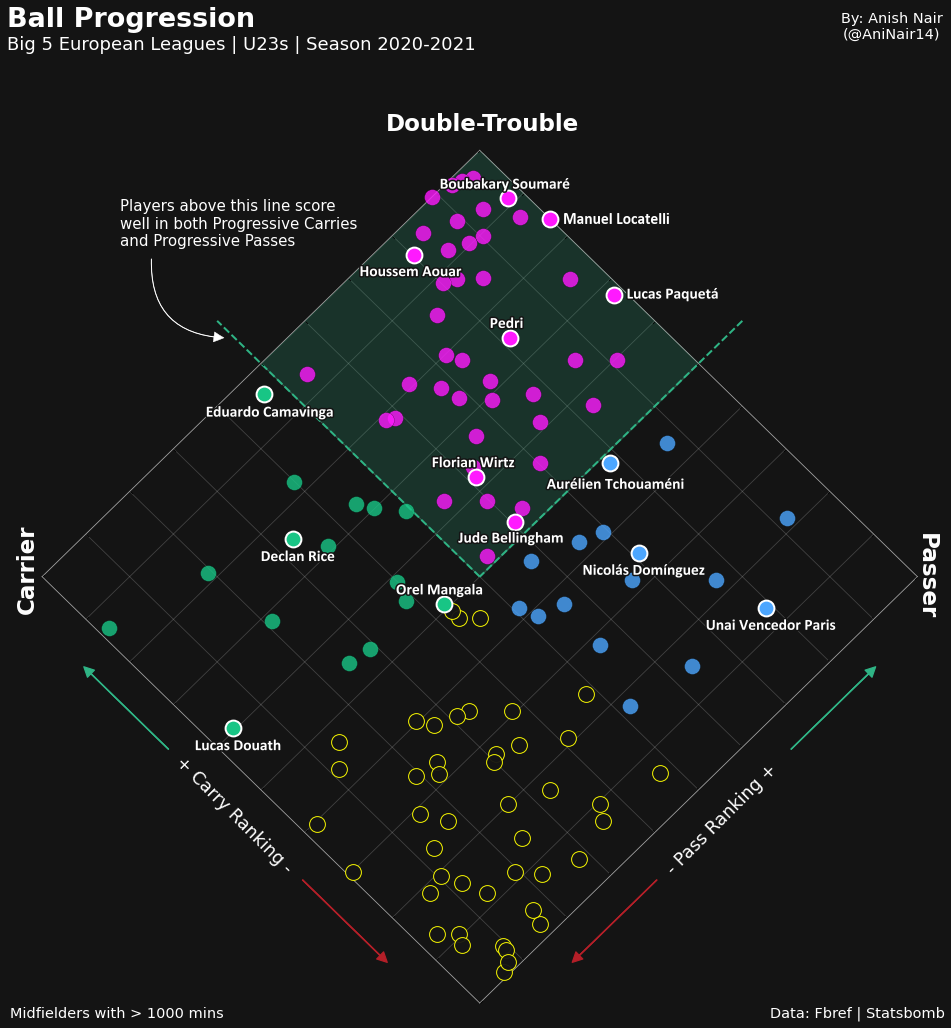

In [20]:
fig = plt.figure(figsize=(16, 16))

ax1, aux_ax1 = setup_axes1(fig, 111)

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

aux_ax1.set_facecolor(bg)
fig.set_facecolor(bg)

aux_ax1.plot([1.1,.5], [.5,.5], color='#2FB485', linestyle = "--", lw=2, zorder=2)
aux_ax1.plot([.5,.5], [.5,1.1], color='#2FB485', linestyle = "--", lw=2, zorder=2)

aux_ax1.fill_between([1,.5], [.5,.5], [1,1], [.5,1], color="#2FB485", alpha=0.2, zorder=2)

#Top
x = top['pass_rank'].tolist()
y = top['carry_rank'].tolist()

aux_ax1.scatter(x, y, s=250, color = '#ff19ff', edgecolors='black', alpha=0.8,  lw=0.25, zorder=3)

aux_ax1.scatter(x[0], y[0],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x[1], y[1],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x[2], y[2],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x[38], y[38],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x[37], y[37],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x[20], y[20],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x[21], y[21],  s=250, color = '#ff19ff', edgecolors='white', alpha=1,  lw=2, zorder=4)

#Labelling for top
dx1, dy1 = top['pass_rank'].values, top['carry_rank'].values

for i in range(len(top)):
    if top.player.iloc[i] == "Manuel Locatelli":
        a = aux_ax1.text(dx1[i]+0.01,dy1[i]-0.019,top.player.iloc[i], ha="left", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif top.player.iloc[i] == "Lucas Paquetá":
        a1 = aux_ax1.text(dx1[i]+0.01,dy1[i]-0.019,top.player.iloc[i], ha="left", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif top.player.iloc[i] == "Boubakary Soumaré":
        a2 = aux_ax1.text(dx1[i]+0.008,dy1[i]+0.015,top.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif top.player.iloc[i] == "Pedri":
        a3 = aux_ax1.text(dx1[i]+0.008,dy1[i]+0.015,top.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif top.player.iloc[i] == "Jude Bellingham":
        a4 = aux_ax1.text(dx1[i]-0.029,dy1[i]-0.02,top.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif top.player.iloc[i] == "Florian Wirtz":
        a5 = aux_ax1.text(dx1[i]+0.008,dy1[i]+0.015,top.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif top.player.iloc[i] == "Houssem Aouar":
        a6 = aux_ax1.text(dx1[i]-0.029,dy1[i]-0.02,top.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)

#Left
x1 = left['pass_rank'].tolist()
y1 = left['carry_rank'].tolist()

aux_ax1.scatter(x1, y1, s=250, color = '#18c585', edgecolors='black', alpha=0.8, lw=0.25, zorder=3)

aux_ax1.scatter(x1[0], y1[0],  s=250, color = '#18c585', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x1[4], y1[4],  s=250, color = '#18c585', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x1[10], y1[10],  s=250, color = '#18c585', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x1[15], y1[15],  s=250, color = '#18c585', edgecolors='white', alpha=1,  lw=2, zorder=4)

#labelling for left:
dx2, dy2 = left['pass_rank'].values, left['carry_rank'].values

for i in range(len(left)):
    if left.player.iloc[i] == "Eduardo Camavinga":
        l = aux_ax1.text(dx2[i]-0.02,dy2[i]-0.032,left.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif left.player.iloc[i] == "Declan Rice":
        l1 = aux_ax1.text(dx2[i]-0.02,dy2[i]-0.032,left.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif left.player.iloc[i] == "Lucas Douath":
        l2 = aux_ax1.text(dx2[i]-0.02,dy2[i]-0.032,left.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif left.player.iloc[i] == "Orel Mangala":
        l3 = aux_ax1.text(dx2[i]+0.006,dy2[i]+0.017,left.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)

#Right
x2 = right['pass_rank'].tolist()
y2 = right['carry_rank'].tolist()

aux_ax1.scatter(x2, y2,s=250, color = '#4CA6FF', edgecolors='black', alpha=0.8,  lw=0.25, zorder=3)

aux_ax1.scatter(x2[2], y2[2],  s=250, color = '#4CA6FF', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x2[3], y2[3],  s=250, color = '#4CA6FF', edgecolors='white', alpha=1,  lw=2, zorder=4)
aux_ax1.scatter(x2[5], y2[5],  s=250, color = '#4CA6FF', edgecolors='white', alpha=1,  lw=2, zorder=4)


#labelling right
dx3, dy3 = right['pass_rank'].values, right['carry_rank'].values

for i in range(len(right)):
    if right.player.iloc[i] == "Unai Vencedor Paris":
        r = aux_ax1.text(dx3[i]-0.02,dy3[i]-0.032,right.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif right.player.iloc[i] == "Aurélien Tchouaméni":
        r1 = aux_ax1.text(dx3[i]-0.024,dy3[i]-0.036,right.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)
    elif right.player.iloc[i] == "Nicolás Domínguez":
        r2 = aux_ax1.text(dx3[i]-0.02,dy3[i]-0.032,right.player.iloc[i], ha="center", color="white", size=15.5, zorder=8, fontweight="bold", fontfamily=body_font)

#Bottom:
aux_ax1.scatter(bottom['pass_rank'],bottom['carry_rank'],s=250, color = bg, edgecolors='#ffff00', lw=1., alpha=0.95, zorder=3)

#Text
fig.text(0.515, 0.89, "Double-Trouble", size=23, zorder=8, color="white", ha="center", fontweight="bold")

fig.text(0.12, 0.475, "Carrier", rotation=90, size=23, zorder=8, color="white", ha="center", fontweight="bold")

fig.text(0.9, 0.47, "Passer", rotation=-90, size=23, zorder=8, color="white", ha="center", fontweight="bold")

d = fig.text(0.672, 0.245, "- Pass Ranking +", rotation =45, size=17.5, zorder=8, color="white")

c = fig.text(0.245, 0.246, "+ Carry Ranking -",rotation =-45, size=17.5, zorder=8, color="white")

b = fig.text(0.2, 0.79, "Players above this line score\nwell in both Progressive Carries\nand Progressive Passes", size=15, zorder=8, color="white")

fig.text(0.21,0.98, "Ball Progression", size=27, zorder=8, color="white", ha="center", fontweight="bold")

fig.text(0.306,0.96, "Big 5 European Leagues | U23s | Season 2020-2021", size=18, zorder=8, color="white", ha="center")

# fig.text(0.87,0.97, "By: Anish Nair\n(@AniNair14)", size=14.5, zorder=8, color="white", ha="center")

fig.text(0.87,0.97, "By: Anish Nair\n(@AniNair14)", size=14.5, zorder=8, color="white", ha="center")

fig.text(0.84,0.12, "Data: Fbref | Statsbomb", size=14.5, zorder=8, color="white", ha="center")

fig.text(0.1975,0.12, "Midfielders with > 1000 mins", size=14.5, zorder=8, color="white", ha="center")

#Arrows
style="Simple,tail_width=0.5,head_width=10,head_length=10"
kw = dict(arrowstyle=style, color="white")

a = patches.FancyArrowPatch((0.5,1.25), (0.49,1.07),
                            connectionstyle="arc3,rad=0.5", **kw,zorder=8,lw=0.5)

kw1 = dict(arrowstyle=style, color="#2FB485")

b = patches.FancyArrowPatch((-0.058,0.65),(-0.058,0.85),
                            **kw1,zorder=8,lw=1.2)

kw2 = dict(arrowstyle=style, color="#B41F28")

c = patches.FancyArrowPatch((-0.058,0.35),(-0.058,0.15),
                            **kw2,zorder=8,lw=1.2)

d = patches.FancyArrowPatch((0.35,-0.058),(0.15,-0.058),
                            **kw2,zorder=8,lw=1.2)

e = patches.FancyArrowPatch((0.65,-0.058),(0.85,-0.058),
                            **kw1,zorder=8,lw=1.2)

aux_ax1.add_patch(a)
aux_ax1.add_patch(b)
aux_ax1.add_patch(c)
aux_ax1.add_patch(d)
aux_ax1.add_patch(e)


#Path effects:
a.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
b.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
c.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
d.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
a1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
a2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
a3.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
a4.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
a5.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
a6.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

l.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
l1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
l2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
l3.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

r.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
r1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])
r2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=bg)])

# plt.savefig("Top5_Prog_final.jpg",facecolor=bg,bbox_inches="tight", dpi=700)